In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from collections import defaultdict
from PIL import Image, ImageOps, ImageDraw

In [58]:
# Load a COCO-pretrained YOLO-NAS-s model
model = YOLO("yolo11ltrained.pt")

In [59]:
image_path = "extra3.png"


image 1/1 /home/ec2-user/SageMaker/extra3.png: 320x640 1 trackjoint, 2 tracknumbers, 2 weiches, 93.6ms
Speed: 1.7ms preprocess, 93.6ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


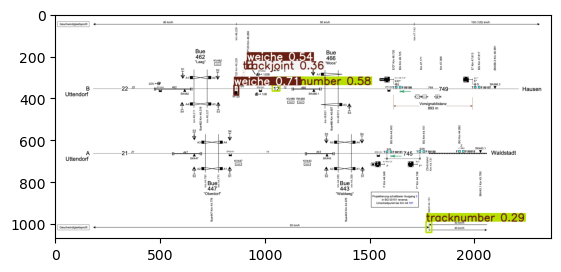

In [60]:
# Predict with the model
results = model(image_path)

%matplotlib inline
import matplotlib.pyplot as plt

# Loop through each result (there might be multiple results if the input is a batch of images)
for result in results:
    # Convert the annotated resul# Export the model
    img = result.plot()

    # Display the image using Matplotlib
    plt.imshow(img)
    #plt.axis("off")  # Hide axis
    plt.show()

In [61]:
# Load the image
img = Image.open(image_path).convert('RGB')
width, height = img.size

window_size = (640, 640)
stride = 320 

In [62]:
def pad_image(image, window_size):
    width, height = image.size
    new_width = ((width // window_size[0]) + 1) * window_size[0] if width % window_size[0] != 0 else width
    new_height = ((height // window_size[1]) + 1) * window_size[1] if height % window_size[1] != 0 else height

    padded_image = ImageOps.pad(image, (new_width, new_height), color=(255, 255, 255))
    return padded_image

# Apply padding to the image
img_padded = pad_image(img, window_size)



In [63]:
def sliding_window(image, window_size, stride):
    width, height = image.size
    window_width, window_height = window_size

    # Iterate over the y-axis with the stride
    for y in range(0, height - window_height + 1, stride):
        # Iterate over the x-axis with the stride
        for x in range(0, width - window_width + 1, stride):
            yield (x, y, image.crop((x, y, x + window_width, y + window_height)))

    # Handle bottom border if not evenly divisible by the window height
    if height % stride != 0:
        y = height - window_height
        for x in range(0, width - window_width + 1, stride):
            yield (x, y, image.crop((x, y, x + window_width, y + window_height)))

    # Handle right border if not evenly divisible by the window width
    if width % stride != 0:
        x = width - window_width
        for y in range(0, height - window_height + 1, stride):
            yield (x, y, image.crop((x, y, x + window_width, y + window_height)))

    # Handle the bottom-right corner if both dimensions are not evenly divisible
    if height % stride != 0 and width % stride != 0:
        yield (width - window_width, height - window_height, image.crop((width - window_width, height - window_height, width, height)))

In [64]:
# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    xi1 = max(x1, x3)
    yi1 = max(y1, y3)
    xi2 = min(x2, x4)
    yi2 = min(y2, y4)

    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    intersection = inter_width * inter_height

    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x4 - x3) * (y4 - y3)

    union = box1_area + box2_area - intersection

    if union == 0:
        return 0

    return intersection / union


0: 640x640 1 radzaehler, 1 trackjoint, 1 tracknumber, 22.8ms
Speed: 1.2ms preprocess, 22.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


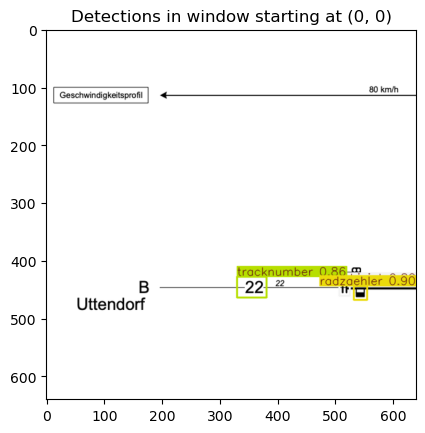


0: 640x640 1 radzaehler, 3 trackjoints, 1 tracknumber, 1 weiche, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


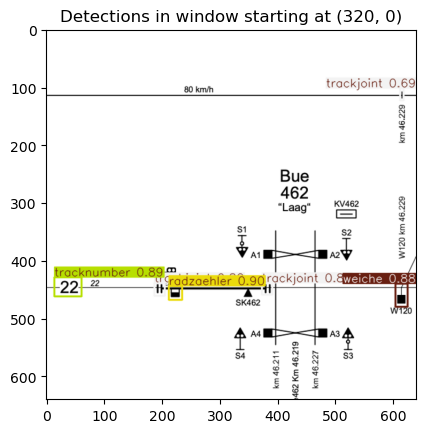


0: 640x640 2 radzaehlers, 3 trackjoints, 2 tracknumbers, 1 weiche, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


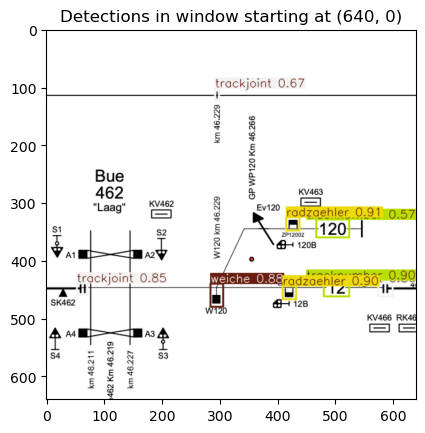


0: 640x640 2 radzaehlers, 2 trackjoints, 2 tracknumbers, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


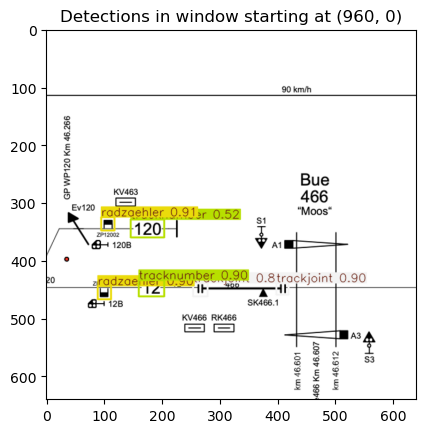


0: 640x640 1 radzaehler, 1 trackjoint, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


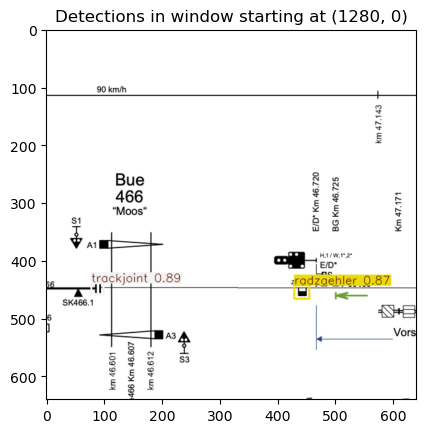


0: 640x640 1 radzaehler, 1 tracknumber, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


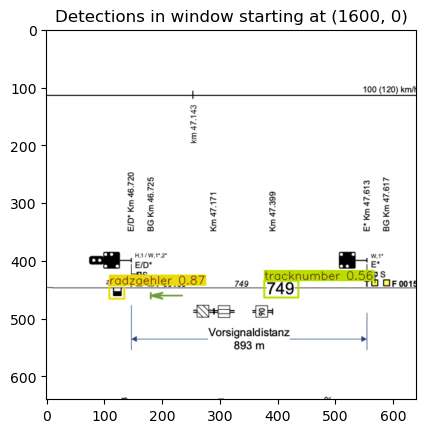


0: 640x640 1 tracknumber, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


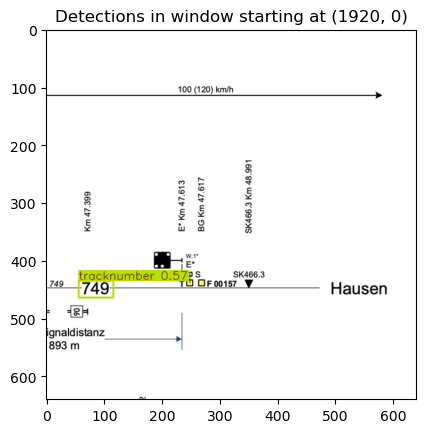


0: 640x640 1 radzaehler, 2 trackjoints, 2 tracknumbers, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


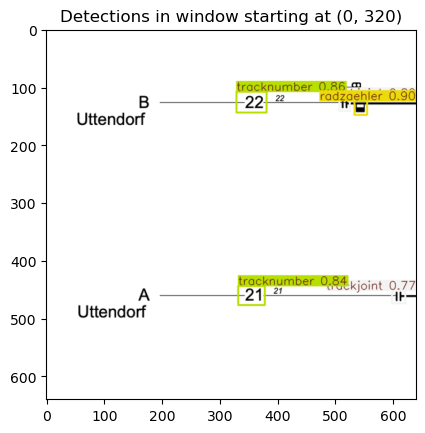


0: 640x640 2 radzaehlers, 4 trackjoints, 2 tracknumbers, 1 weiche, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


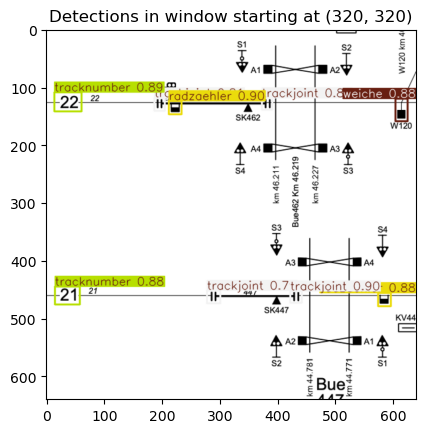


0: 640x640 3 radzaehlers, 3 trackjoints, 2 tracknumbers, 1 weiche, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


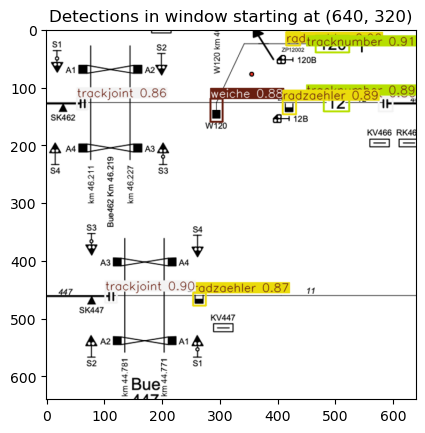


0: 640x640 2 radzaehlers, 4 trackjoints, 2 tracknumbers, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


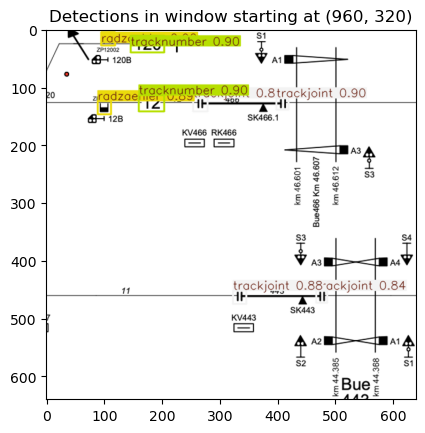


0: 640x640 2 radzaehlers, 3 trackjoints, 1 tracknumber, 22.0ms
Speed: 1.2ms preprocess, 22.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


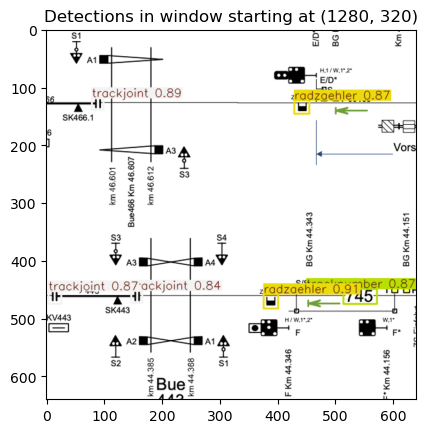


0: 640x640 2 radzaehlers, 2 tracknumbers, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


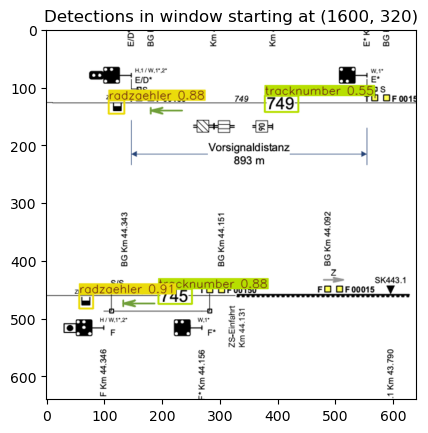


0: 640x640 1 tracknumber, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


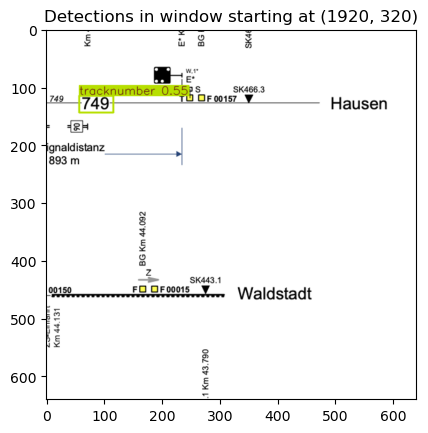


0: 640x640 1 trackjoint, 1 tracknumber, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


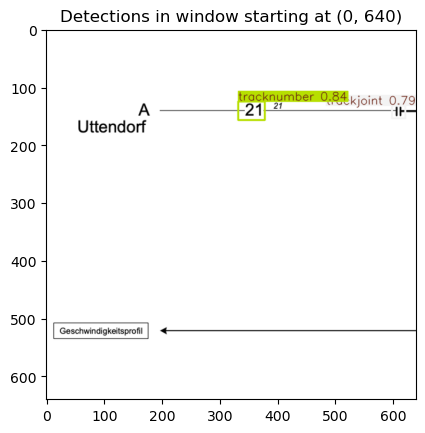


0: 640x640 1 radzaehler, 2 trackjoints, 1 tracknumber, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


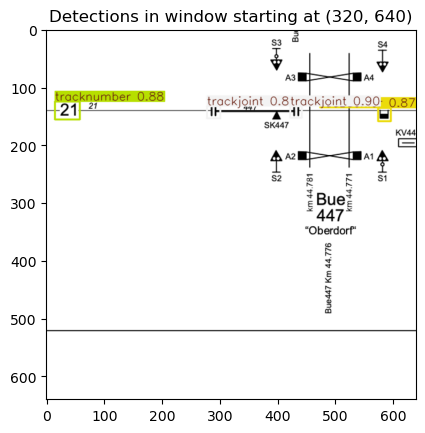


0: 640x640 1 radzaehler, 1 trackjoint, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


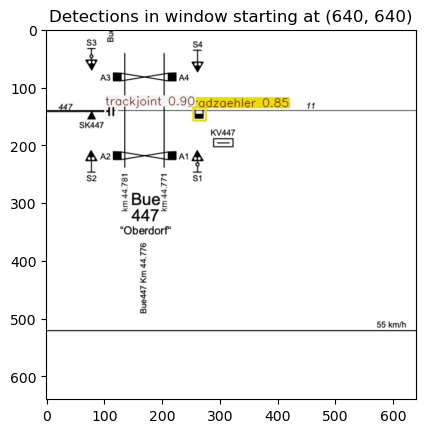


0: 640x640 2 trackjoints, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


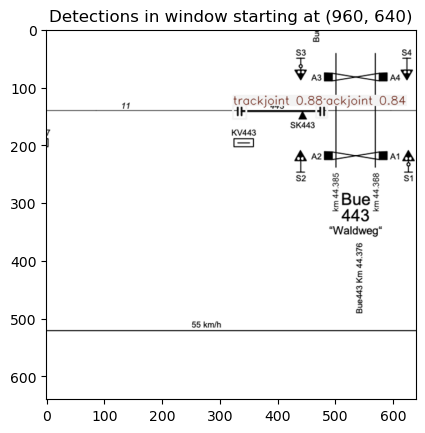


0: 640x640 1 radzaehler, 2 trackjoints, 1 tracknumber, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


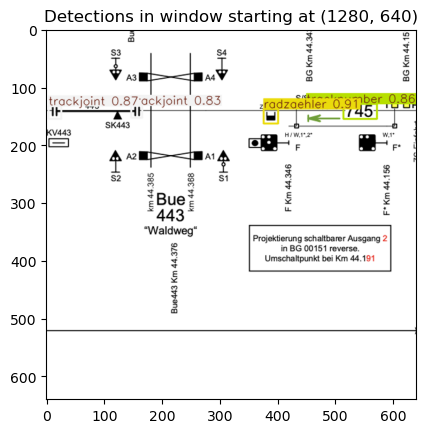


0: 640x640 1 radzaehler, 1 tracknumber, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


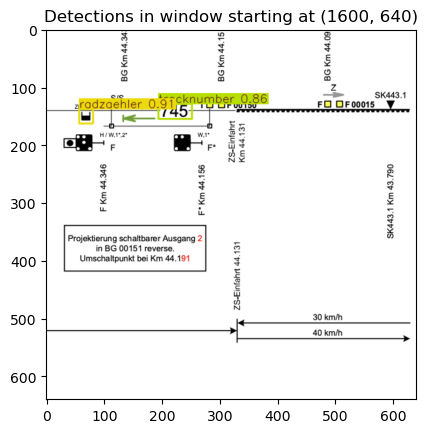


0: 640x640 (no detections), 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


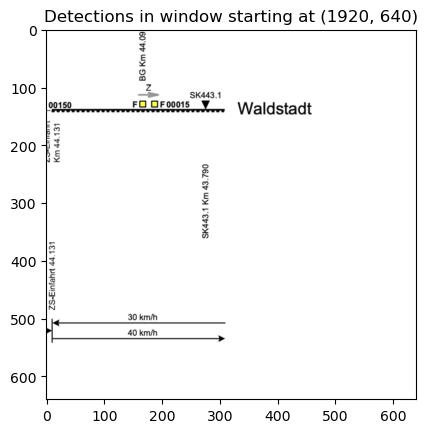

Symbol counts:
Symbol: radzaehler, Count: 6
Symbol: tracknumber, Count: 6
Symbol: trackjoint, Count: 9
Symbol: weiche, Count: 1


In [65]:
# Store detected symbols and their coordinates
detected_symbols = []

# Iterate over each window in the image
for (x, y, window) in sliding_window(img_padded, window_size, stride):
    # Convert the window to a format the model understands (tensor)
    window_tensor = torch.from_numpy(np.array(window)).permute(2, 0, 1).float().div(255.0).unsqueeze(0)

    # Run the YOLO model on each window
    results = model(window_tensor)

    # Check if results is a list and iterate over it
    if isinstance(results, list):
        for result in results:  # Iterate over each Results object
            # Extract boxes from each result
            if hasattr(result, 'boxes') and result.boxes is not None:
                # Loop through all detected boxes
                # If there are detections, display the window
                img_with_boxes = result.plot()  # Create image with drawn boxes
                
                # Display the image using Matplotlib
                plt.imshow(img_with_boxes)
                plt.title(f"Detections in window starting at ({x}, {y})")
                plt.show()
                for box in result.boxes:
                    # Get bounding box coordinates
                    x1, y1, x2, y2 = box.xyxy[0]  # Assuming box.xyxy has the desired shape (n, 4)
                    
                    # Get confidence score
                    confidence = box.conf[0]
                    
                    # Get class ID and convert to class name using results.names
                    class_id = int(box.cls[0])
                    class_name = result.names[class_id]

                    # Apply confidence filtering if needed (e.g., only consider if confidence > 0.5)
                    if confidence > 0.3:
                        # Translate box coordinates to original image coordinates
                        box_in_original = (x1 + x, y1 + y, x2 + x, y2 + y)

                        # Check for overlap with existing symbols
                        is_new_symbol = True
                        for existing in detected_symbols:
                            if existing['label'] == class_name:
                                iou = calculate_iou(existing['box'], box_in_original)
                                if iou > 0.5:  # Threshold to determine if two boxes are overlapping
                                    is_new_symbol = False
                                    break

                        # If it's a new symbol, add it to the list of detected symbols
                        if is_new_symbol:
                            detected_symbols.append({
                                'label': class_name,
                                'box': box_in_original
                            })
    else:
        # Handle case where results is not a list, just a single Results object
        if hasattr(results, 'boxes') and results.boxes is not None:
            # Loop through all detected boxes
            # If there are detections, display the window
            img_with_boxes = results.plot()  # Create image with drawn boxes
            
            # Display the image using Matplotlib
            plt.imshow(img_with_boxes)
            plt.title(f"Detections in window starting at ({x}, {y})")
            plt.show()
            for box in results.boxes:
                # Get bounding box coordinates
                x1, y1, x2, y2 = box.xyxy[0]  # Assuming box.xyxy has the desired shape (n, 4)

                # Get confidence score
                confidence = box.conf[0]

                # Get class ID and convert to class name using results.names
                class_id = int(box.cls[0])
                class_name = results.names[class_id]

                # Apply confidence filtering if needed (e.g., only consider if confidence > 0.5)
                if confidence > 0.3:
                    # Translate box coordinates to original image coordinates
                    box_in_original = (x1 + x, y1 + y, x2 + x, y2 + y)

                    # Check for overlap with existing symbols
                    is_new_symbol = True
                    for existing in detected_symbols:
                        if existing['label'] == class_name:
                            iou = calculate_iou(existing['box'], box_in_original)
                            if iou > 0.5:  # Threshold to determine if two boxes are overlapping
                                is_new_symbol = False
                                break

                    # If it's a new symbol, add it to the list of detected symbols
                    if is_new_symbol:
                        detected_symbols.append({
                            'label': class_name,
                            'box': box_in_original
                        })

# Print all detected symbols and their counts
symbol_counts = defaultdict(int)
for symbol in detected_symbols:
    symbol_counts[symbol['label']] += 1

print("Symbol counts:")
if not symbol_counts:
    print("No symbols detected.")
else:
    for label, count in symbol_counts.items():
        print(f"Symbol: {label}, Count: {count}")


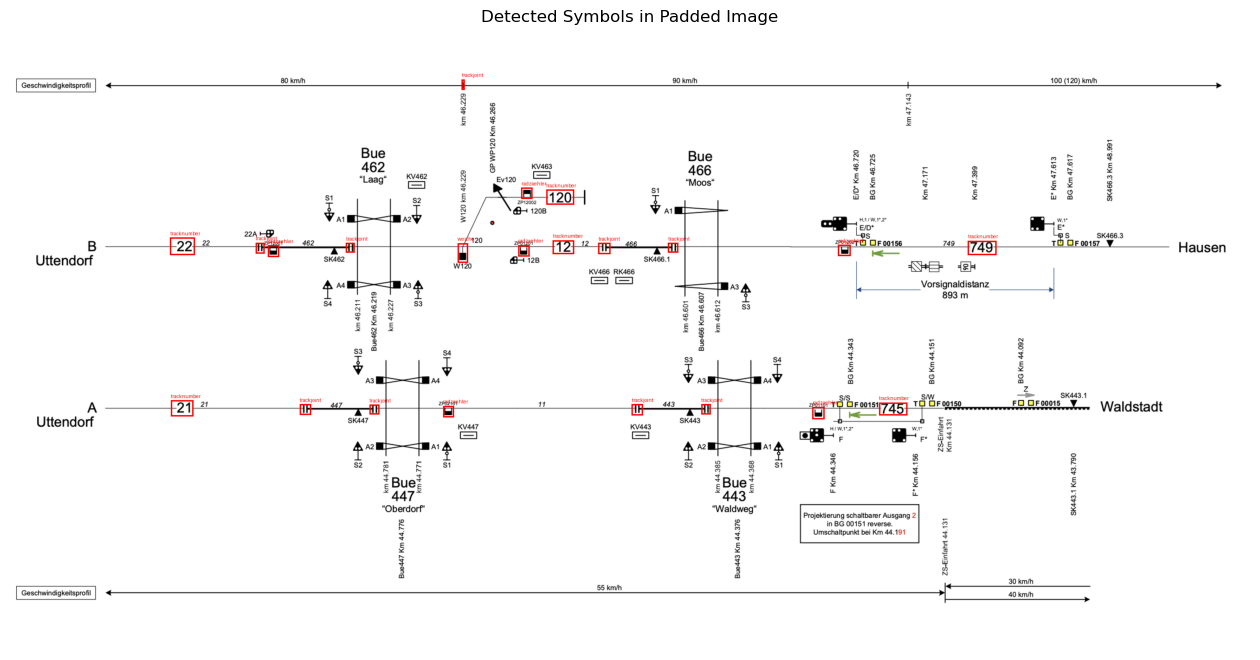

In [66]:
# Draw all detected boxes on the original image
if detected_symbols:
    draw = ImageDraw.Draw(img_padded)
    for symbol in detected_symbols:
        x1, y1, x2, y2 = symbol['box']
        label = symbol['label']
        # Draw the bounding box with correct position adjustments
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        # Adjust label position to make it more readable and avoid overlap
        text_position = (x1, max(0, y1 - 15))  # Ensure the label does not go out of bounds
        draw.text(text_position, label, fill="red")

    # Display the padded image with all bounding boxes
    plt.figure(figsize=(16, 16))  # Increase figure size for better visibility
    plt.imshow(img_padded)
    plt.title("Detected Symbols in Padded Image")
    plt.axis('off')
    plt.savefig(f"after.png", bbox_inches='tight', pad_inches=0)
    plt.show()